### This is Data set of teenage customers (mostly)
### Marketing agencies wants to target the customers upon their hobbies and age.
### Create the K-means cluster & group the people based on similarity & find the number of clusters.

# Author- Rohan Kulkarni

In [1]:
import pandas as pd 
import numpy as np

In [2]:
sns=pd.read_csv(r'E:\Imarticus\10.K-MEANS\snsdata.csv')

In [3]:
sns

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
sns.shape

(30000, 40)

In [5]:
sns.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [6]:
sns.gender.value_counts()

F    22054
M     5222
Name: gender, dtype: int64

In [7]:
sns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [8]:
sns.gender=sns.gender.fillna('F')

In [9]:
sns.age=sns.age.fillna(sns.age.mean())

In [10]:
sns.gender=sns.gender.replace({'M':0,'F':1})

In [11]:
sns.isnull().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

In [12]:
sns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        30000 non-null  int64  
 2   age           30000 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans_sns= KMeans(n_clusters=3)

In [15]:
kmeans_sns.fit(sns)

KMeans(n_clusters=3)

In [16]:
kmeans_sns.labels_

array([1, 1, 0, ..., 1, 1, 1])

In [17]:
type(kmeans_sns.labels_)

numpy.ndarray

In [18]:
list1=list(kmeans_sns.labels_)

In [19]:
len(kmeans_sns.labels_)

30000

In [20]:
list1 # ther will be three numbers 0,1,2 (coz, we gave no. of clusters as 3)

[1,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 0,


In [21]:
list1.count(0)

8778

In [22]:
list1.count(1)

19867

In [23]:
list1.count(2)

1355

In [24]:
20164+1355+8481

30000

In [25]:
kmeans_sns.cluster_centers_ # these are the cetroid of there 3 clusters containing 40 values each...
                            # there are 40 columns, each column is of single dimension..that's why there are 40 columns

array([[2.00757439e+03, 8.53383459e-01, 1.79248269e+01, 5.64129642e+01,
        3.12713602e-01, 2.82182730e-01, 2.57575758e-01, 2.19184324e-01,
        1.75438596e-01, 1.55730235e-01, 1.22009569e-01, 1.17908407e-01,
        9.46684894e-02, 1.56299841e-01, 3.76623377e-01, 2.10868079e-01,
        1.52882206e-01, 1.42515379e-01, 1.13465482e-01, 4.95443153e-01,
        3.31738437e-01, 4.87582593e-02, 7.78765095e-01, 2.68967874e-01,
        5.39416724e-01, 3.08954204e-01, 1.39439508e-01, 2.26703121e-02,
        4.49419002e-01, 1.29528366e-01, 1.36249715e-01, 3.00979722e-01,
        4.23103213e-01, 1.63135111e-01, 9.05673274e-02, 6.52768284e-02,
        1.92412850e-01, 1.28275234e-01, 9.01116427e-02, 5.99225336e-02],
       [2.00745392e+03, 8.08174359e-01, 1.80412788e+01, 1.08365128e+01,
        2.39442291e-01, 2.36371873e-01, 2.05869029e-01, 1.29158907e-01,
        1.24377108e-01, 1.23370413e-01, 9.32199124e-02, 9.70453516e-02,
        8.34549756e-02, 1.32783007e-01, 2.88719988e-01, 2.07479

In [26]:
pd.DataFrame(kmeans_sns.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2007.574391,0.853383,17.924827,56.412964,0.312714,0.282183,0.257576,0.219184,0.175439,0.155730,...,0.136250,0.300980,0.423103,0.163135,0.090567,0.065277,0.192413,0.128275,0.090112,0.059923
1,2007.453919,0.808174,18.041279,10.836513,0.239442,0.236372,0.205869,0.129159,0.124377,0.123370,...,0.080032,0.227362,0.311874,0.140585,0.056123,0.041476,0.178638,0.106206,0.084713,0.061308
2,2007.693727,0.908487,17.747801,143.839114,0.382288,0.292251,0.245018,0.255351,0.208856,0.157934,...,0.134317,0.414760,0.501845,0.169742,0.137269,0.101845,0.210332,0.140959,0.121771,0.050923


In [27]:
kmeans_sns.score(sns) # SSD for value o f K=3 is score.
                      # It want to indicate that SSD can be reduced ( while building the elbow plot take the absolute value.)

-11294903.637875892

In [28]:
# to get the elbow plot we will run our model multiple times for multiple values of K

In [29]:
l1=list(range(1,10))
score_list=[]
for k in l1:
    kmeans_sns= KMeans(n_clusters=k)
    kmeans_sns.fit(sns)
    score_sns=kmeans_sns.score(sns)             
    score_list.append(score_sns)
    

In [30]:
score_list = np.round(np.abs(score_list))
score_list

array([42274975., 18609121., 11298651.,  8109254.,  6334939.,  5054696.,
        3995876.,  3104701.,  2559357.])

In [31]:
import matplotlib.pyplot as plt

Text(4, 8109247, 'K=4 is optimum choice')

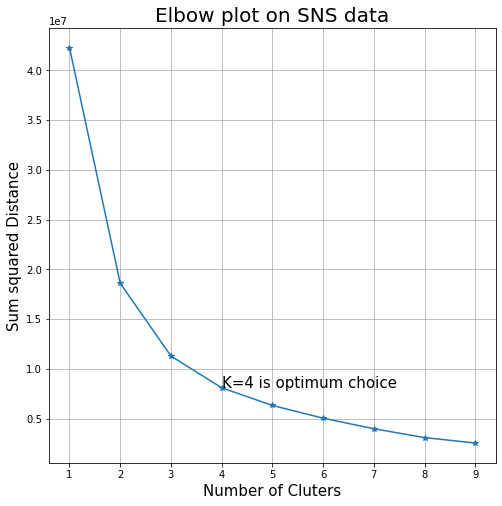

In [32]:
number=[1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(8,8))
plt.plot(number,score_list,marker='*')
plt.grid()
plt.xlabel('Number of Cluters',size=15)
plt.ylabel('Sum squared Distance',size=15)
plt.title('Elbow plot on SNS data',size=20)
plt.text(x=4,y=8109247,s='K=4 is optimum choice',size=15)

### So, now we will create the final model with value of k=4

In [33]:
kmeans_sns=KMeans(n_clusters=4)
kmeans_sns.fit(sns)

KMeans(n_clusters=4)

In [34]:
df_with_centres=pd.DataFrame(kmeans_sns.cluster_centers_)

In [35]:
df_with_centres.columns=sns.columns

In [36]:
df_with_centres

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007.626620,0.871760,17.855829,85.492981,0.326404,0.282397,0.282397,0.238661,0.180076,0.144708,...,0.103402,0.343683,0.455724,0.163337,0.102052,0.075054,0.175756,0.124460,0.098812,0.052106
1,2007.440662,0.807233,18.109203,7.281699,0.228146,0.232265,0.197613,0.122009,0.114800,0.119707,...,0.081299,0.222269,0.302599,0.136245,0.054401,0.040225,0.179500,0.102744,0.083480,0.063549
2,2007.782765,0.931777,17.675512,185.050269,0.402154,0.305206,0.260323,0.233393,0.229803,0.175943,...,0.147217,0.407540,0.533214,0.193896,0.149013,0.116697,0.204668,0.143627,0.125673,0.064632
3,2007.538237,0.834597,17.862502,39.584705,0.305568,0.272855,0.241551,0.195841,0.173744,0.154029,...,0.125758,0.276430,0.391031,0.161720,0.079831,0.057192,0.194432,0.128899,0.089363,0.057951


In [37]:
kmeans_sns.labels_

array([1, 1, 0, ..., 1, 1, 1])

In [38]:
final_df=pd.concat([sns,pd.Series(kmeans_sns.labels_)],axis=1)

In [39]:
final_df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,0
0,2006,0,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,1,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2006,0,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2006,1,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2006,1,18.995,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


In [40]:
final_df.rename(columns={final_df.columns[40] :"Labels/clusters"},inplace=True)

In [41]:
final_df.head(2)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,Labels/clusters
0,2006,0,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,1,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [42]:
final_df=final_df.sort_values('Labels/clusters')

In [43]:
final_df.head(10)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,Labels/clusters
19810,2008,0,16.42700,85,1,2,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
18399,2008,1,17.99395,73,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21810,2008,1,17.05400,114,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8579,2007,0,17.77100,67,1,1,0,0,2,0,...,0,1,0,0,0,2,0,0,0,0
5962,2006,0,18.45600,82,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15604,2008,1,16.56400,70,1,0,0,0,0,0,...,4,1,0,0,0,1,1,0,0,0
25862,2009,1,15.57300,65,0,0,2,0,0,1,...,2,1,0,0,0,0,0,0,0,0
3044,2006,1,18.82500,87,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3046,2006,0,18.95400,102,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
10643,2007,1,17.99300,127,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


# DBSCAN

In [45]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [46]:
scaler = StandardScaler()

In [47]:
scaled_sns=scaler.fit_transform(sns)

In [49]:
scaled_sns.shape

(30000, 40)

In [50]:
scaled_sns=normalize(scaled_sns)

In [51]:
dbscan =DBSCAN (eps=0.6,min_samples=7)
model_db=dbscan.fit(scaled_sns)

In [52]:
model_db.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
list1=list(model_db.labels_)

In [54]:
np.unique(list1)

array([-1,  0,  1,  2], dtype=int64)

In [55]:
# -1 is nothing but noise points
list1.count(-1)

7201

In [56]:
list1.count(0)

22742

In [57]:
list1.count(1)

45

In [58]:
list1.count(2)

12